In [26]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

In [27]:
df = pd.read_csv("database.csv")
print(df.shape)
df.head()

(2468, 19)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,name
0,0.782,0.972,5,-7.542,0,0.1480,0.02550,0.000013,0.3690,0.557,133.967,audio_features,1YFTLSuSQ0odUosJIVTvOC,spotify:track:1YFTLSuSQ0odUosJIVTvOC,https://api.spotify.com/v1/tracks/1YFTLSuSQ0od...,https://api.spotify.com/v1/audio-analysis/1YFT...,326839,4,Ishq Kaminaa
1,0.696,0.888,0,-2.285,0,0.0336,0.05920,0.000185,0.1310,0.676,120.976,audio_features,7pCE1BHlNVbvIuqUEOGAj5,spotify:track:7pCE1BHlNVbvIuqUEOGAj5,https://api.spotify.com/v1/tracks/7pCE1BHlNVbv...,https://api.spotify.com/v1/audio-analysis/7pCE...,214067,4,Bhool Ja
2,0.621,0.704,7,-5.293,0,0.0236,0.10100,0.000000,0.1850,0.366,99.942,audio_features,4kO9vFarqUPNwlgFnVNgVh,spotify:track:4kO9vFarqUPNwlgFnVNgVh,https://api.spotify.com/v1/tracks/4kO9vFarqUPN...,https://api.spotify.com/v1/audio-analysis/4kO9...,291240,4,Tanha Dil
3,0.830,0.770,9,-4.135,0,0.1120,0.48300,0.000001,0.1270,0.927,99.990,audio_features,5VG9YmTLrTuhOlhWYDdI8v,spotify:track:5VG9YmTLrTuhOlhWYDdI8v,https://api.spotify.com/v1/tracks/5VG9YmTLrTuh...,https://api.spotify.com/v1/audio-analysis/5VG9...,216453,4,Sexy Mama
4,0.758,0.918,7,-2.487,1,0.1080,0.00085,0.000154,0.0619,0.721,98.071,audio_features,6dWQ9E5mFjQZA7ujh3wd2Z,spotify:track:6dWQ9E5mFjQZA7ujh3wd2Z,https://api.spotify.com/v1/tracks/6dWQ9E5mFjQZ...,https://api.spotify.com/v1/audio-analysis/6dWQ...,93760,4,Ari Ari (Part 1)


In [28]:
df["mood_vec"] = df[["valence", "energy"]].values.tolist()
df["mood_vec"].head()

0                 [0.557, 0.972]
1    [0.6759999999999999, 0.888]
2    [0.366, 0.7040000000000001]
3                  [0.927, 0.77]
4    [0.721, 0.9179999999999999]
Name: mood_vec, dtype: object

In [29]:
lix=[]
liy=[]
for i in range(len(df["mood_vec"])):
    lix.append(df["mood_vec"][i][0])
    liy.append(df["mood_vec"][i][1])
    


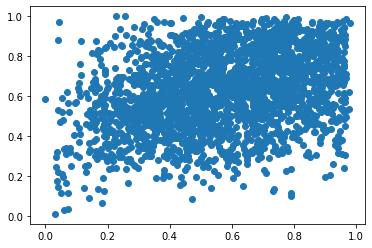

In [30]:
plt.plot(np.array(lix),np.array(liy),'o')
plt.show()

In [31]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Authentication
client_credentials_manager = SpotifyClientCredentials(client_id='4b4cb4f8525543959104a2168e29e1c9', client_secret='8ea4d3b6032c4a35ba22999240e6859d')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [40]:
def recommend(track_id, ref_df, sp, n_recs = 5):
    
    # Crawl valence and arousal of given track from spotify api
    track_features = sp.audio_features(track_id)[0]
    track_moodvec = np.array([track_features['valence'], track_features['energy']])
    #print(f"mood_vec for {track_id}: {track_moodvec}")
    
    # Compute distances to all reference tracks
    ref_df["distances"] = ref_df["mood_vec"].apply(lambda x: norm(track_moodvec-np.array(x)))
    # Sort distances from lowest to highest
    ref_df_sorted = ref_df.sort_values(by = "distances", ascending = True)
    # If the input track is in the reference set, it will have a distance of 0, but should not be recommendet
    ref_df_sorted = ref_df_sorted[ref_df_sorted["id"] != track_id]
    
    # Return n recommendations
    return ref_df_sorted.iloc[:n_recs]['id']

In [41]:
track1 = random.choice(df["id"])
print(track1)
r=list(recommend(track_id = track1, ref_df = df, sp = sp, n_recs = 5))

2SRv30X7NoYRZB62dX0UzH


In [42]:
r

['2SaOyPRiig9Ja95lCYJCDk',
 '2wzL4qF4EVxvhDRjS3PYhK',
 '0YxzH0SUc10Vw4yLFqU06I',
 '2bWEf2FVLHzqME4xVCjgs2',
 '2rEKnx0JgrhwiWanoYdw5a']